In [66]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
%matplotlib notebook
style.use('Solarize_Light2')

<IPython.core.display.Javascript object>


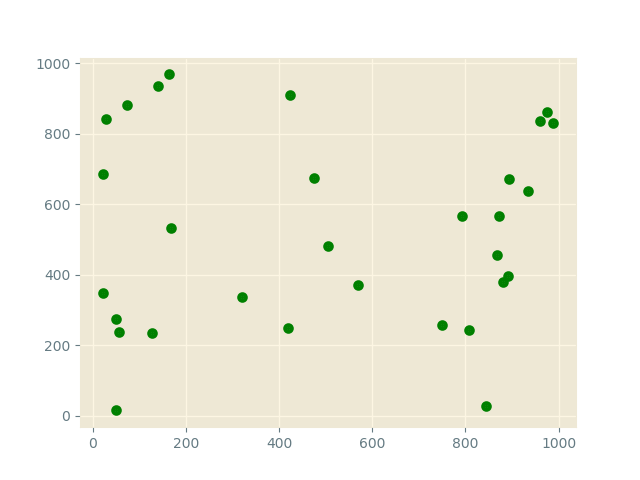

In [67]:
B = [np.random.choice(1000,2) for _ in range(30)]
X = np.vstack(B)

plt.figure()
plt.scatter(X[:,0],X[:,1],s=7,linewidths=5,c='g')


In [68]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>


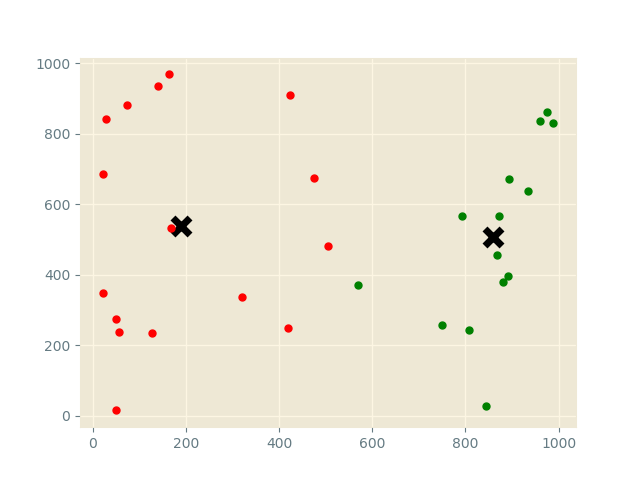

In [69]:
centroids = clf.cluster_centers_
labels = clf.labels_
colors = ['g.', 'r.','c.','b.','k.','o.']


plt.figure()
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]],markersize=10)
    
plt.scatter(centroids[:,0],centroids[:,1], marker='x',s=150,linewidth=5,c='k')



In [122]:
class K_means:
    def __init__(self, k =2,tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):
        self.centroids = {}
        #np.random.shuffle(data)
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iter):
        #for i in range(1):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances  = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                #pass

            optimized = True 
            
            for c in self.centroids:
                oroginal_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum( (current_centroid - oroginal_centroid)/oroginal_centroid *100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
    
    def predict(self,data):
        distance = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distance.index(min(distance))
        return classification

In [123]:
c_clf = K_means()
c_clf.fit(X)

In [124]:
colors1 = ['r','g','b']

<IPython.core.display.Javascript object>


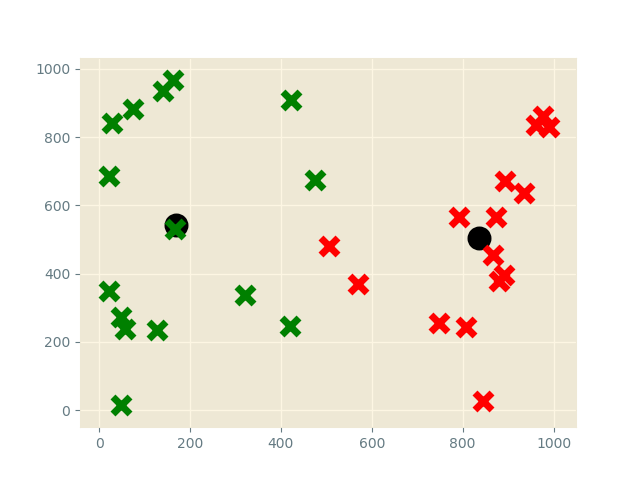

In [125]:
plt.figure()
for centroid in c_clf.centroids:
    plt.scatter(c_clf.centroids[centroid][0], c_clf.centroids[centroid][1], marker="o", color='k', s=150,linewidth=5)
    
for classification in c_clf.classifications:
    color = colors1[classification]
    for featureset in c_clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x',color=color,s=150,linewidth=5)